In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

MODEL COEFFICIENTS:
  enginesize:    4523.40
  horsepower:    1694.22
     citympg:    -392.57
  highwaympg:    -816.36
   Intercept:  13223.41

 MODEL PERFORMANCE:
         MSE: 16471505.90
        RMSE:   4058.51
   R-squares:      0.79


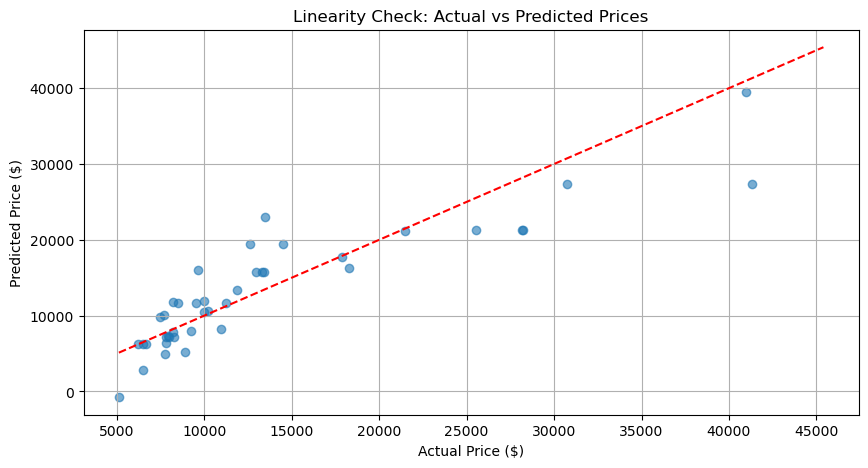

In [4]:
df=pd.read_csv('CarPrice_Assignment.csv')
x=df[['enginesize','horsepower','citympg','highwaympg']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print("="*50)
print("MODEL COEFFICIENTS:")
for feature,coef in zip(x.columns,model.coef_):
    print(f"{feature:>12}: {coef:>10.2f}")
print(f"{'Intercept':>12}:{model.intercept_:>10.2f}")
print("\n MODEL PERFORMANCE:")
print(f"{'MSE':>12}: {mean_squared_error(y_test,y_pred):>10.2f}")
print(f"{'RMSE':>12}:{np.sqrt(mean_squared_error(y_test,y_pred)):>10.2f}")
print(f"{'R-squares':>12}:{r2_score(y_test,y_pred):10.2f}")
print("="*50)
# 1. Linearity check
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

In [9]:
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}",
      "\n(Values close to 2 indicate no autocorrelation)")


Durbin-Watson Statistic: 2.28 
(Values close to 2 indicate no autocorrelation)


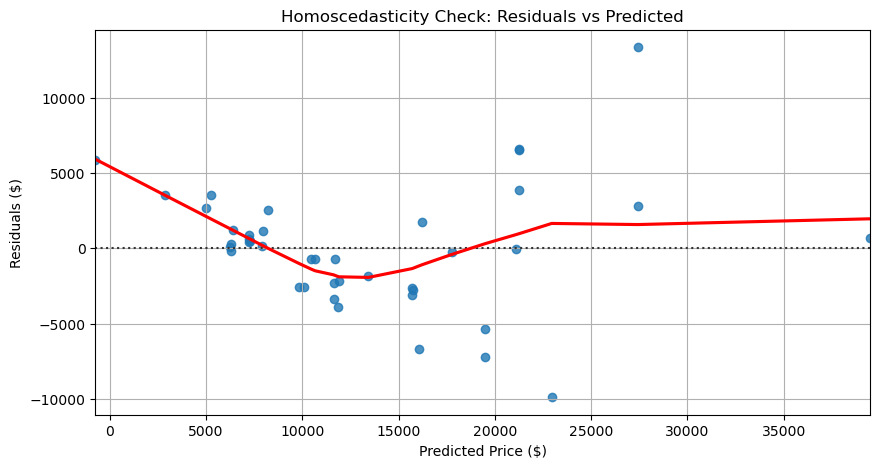

In [10]:
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

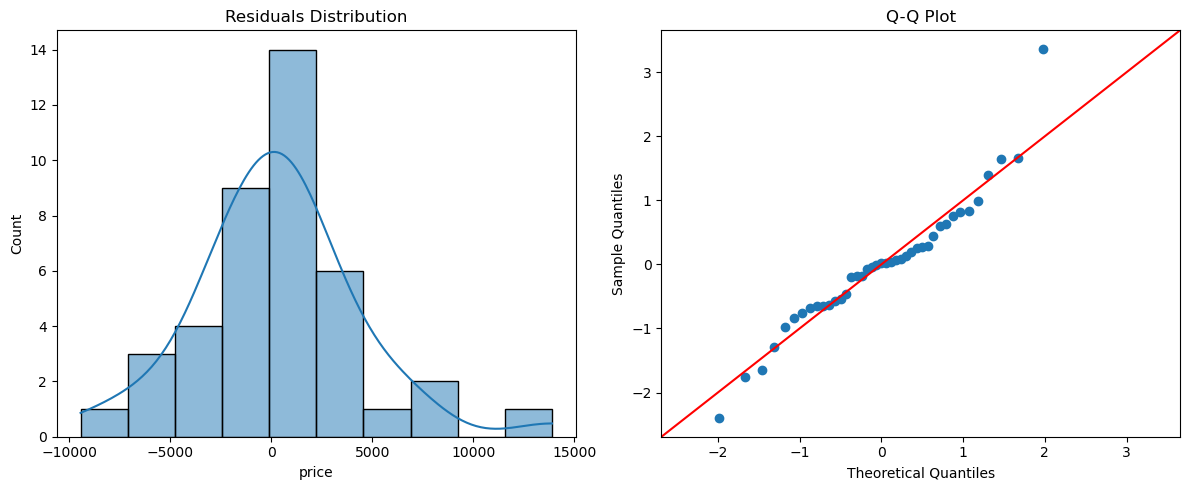

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()